<a href="https://colab.research.google.com/github/ndibedivine0/ndibedivine0/blob/main/NYC_taxi_Tip_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook we are going to have an insight on how taxi drivers are tipped and how differnt factors(features) affect how the amount a taxi driver is tipped.

Here is the steps taken
* Problem

predict the amount tipped to a driver after a trip

* Data

our data is gotten from here:  "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"

* Evaluation

The evaluation metric is means squred error or rootmean squared error

* Feature engineering
We are going to use different features from our data to see how it affect our target(tip_amount)



In [38]:
import pandas as pd
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
df = pd.read_parquet(url)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [39]:
len(df)

3066766

In [40]:
# check for missing values
df.isna().sum()


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71743
trip_distance,0
RatecodeID,71743
store_and_fwd_flag,71743
PULocationID,0
DOLocationID,0
payment_type,0


In [41]:
df = df.drop(columns=['store_and_fwd_flag','tpep_pickup_datetime','tpep_dropoff_datetime','total_amount'])

In [42]:
# fill missing values
df['passenger_count'] = df['passenger_count'].fillna(1)
df['RatecodeID'] = df['RatecodeID'].fillna(99)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
df['airport_fee'] = df['airport_fee'].fillna(0)

In [43]:
df['airport_fee'].median()

0.0

In [ ]:
df.dtypes

,0
VendorID,int64
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
fare_amount,float64
extra,float64
mta_tax,float64


In [49]:
df = df.sample(frac=1,replace= = False)

In [50]:
df.select_dtypes(include = 'number').agg(['min','max','mean']).T

,min,max,mean
VendorID,1.00,2.00,1.751696
passenger_count,1.00,6.00,1.368549
trip_distance,0.51,96.70,3.475754
RatecodeID,1.00,99.00,3.666175
PULocationID,1.00,265.00,167.464087
DOLocationID,1.00,265.00,165.769047
payment_type,0.00,4.00,0.973374
fare_amount,0.01,472.70,18.779834
extra,0.00,12.50,1.569668
mta_tax,0.00,4.00,0.498035


In [48]:
# remove outliers from trip distance
df =df[df['trip_distance']<100]
df =df[df['trip_distance']>0.5]

# remove fare or total amount outliers
df =df[df['fare_amount']<500]
df =df[df['fare_amount']>0]

# remove impossible passenger counts
df =df[df['passenger_count']<=6]
df =df[df['passenger_count']>0]

# reomve outliers in tip_amount
df =df[df['tip_amount']<200]
df =df[df['tip_amount']>0]

# drop records with negative extras, mta_tax, toll_amount, improvement_surchage, congestion_surcharge, airport_fee
invalid_col = ['extra','mta_tax','tolls_amount','improvement_surcharge','congestion_surcharge','airport_fee']
for col in invalid_col:
    df = df[df[col]>=0]

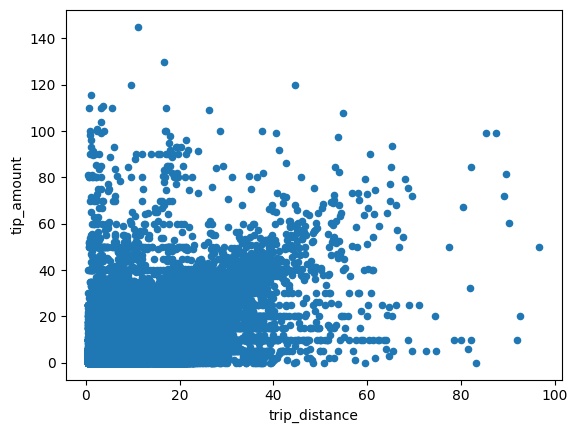

In [51]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='trip_distance', y='tip_amount')
plt.show()

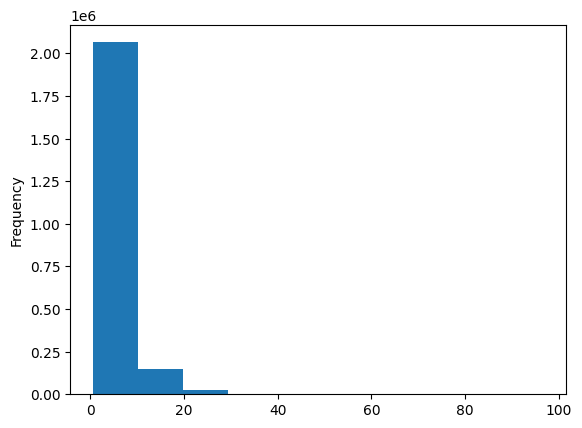

In [52]:
df['trip_distance'].plot(kind='hist')
plt.show()

In [ ]:
import seaborn as sns

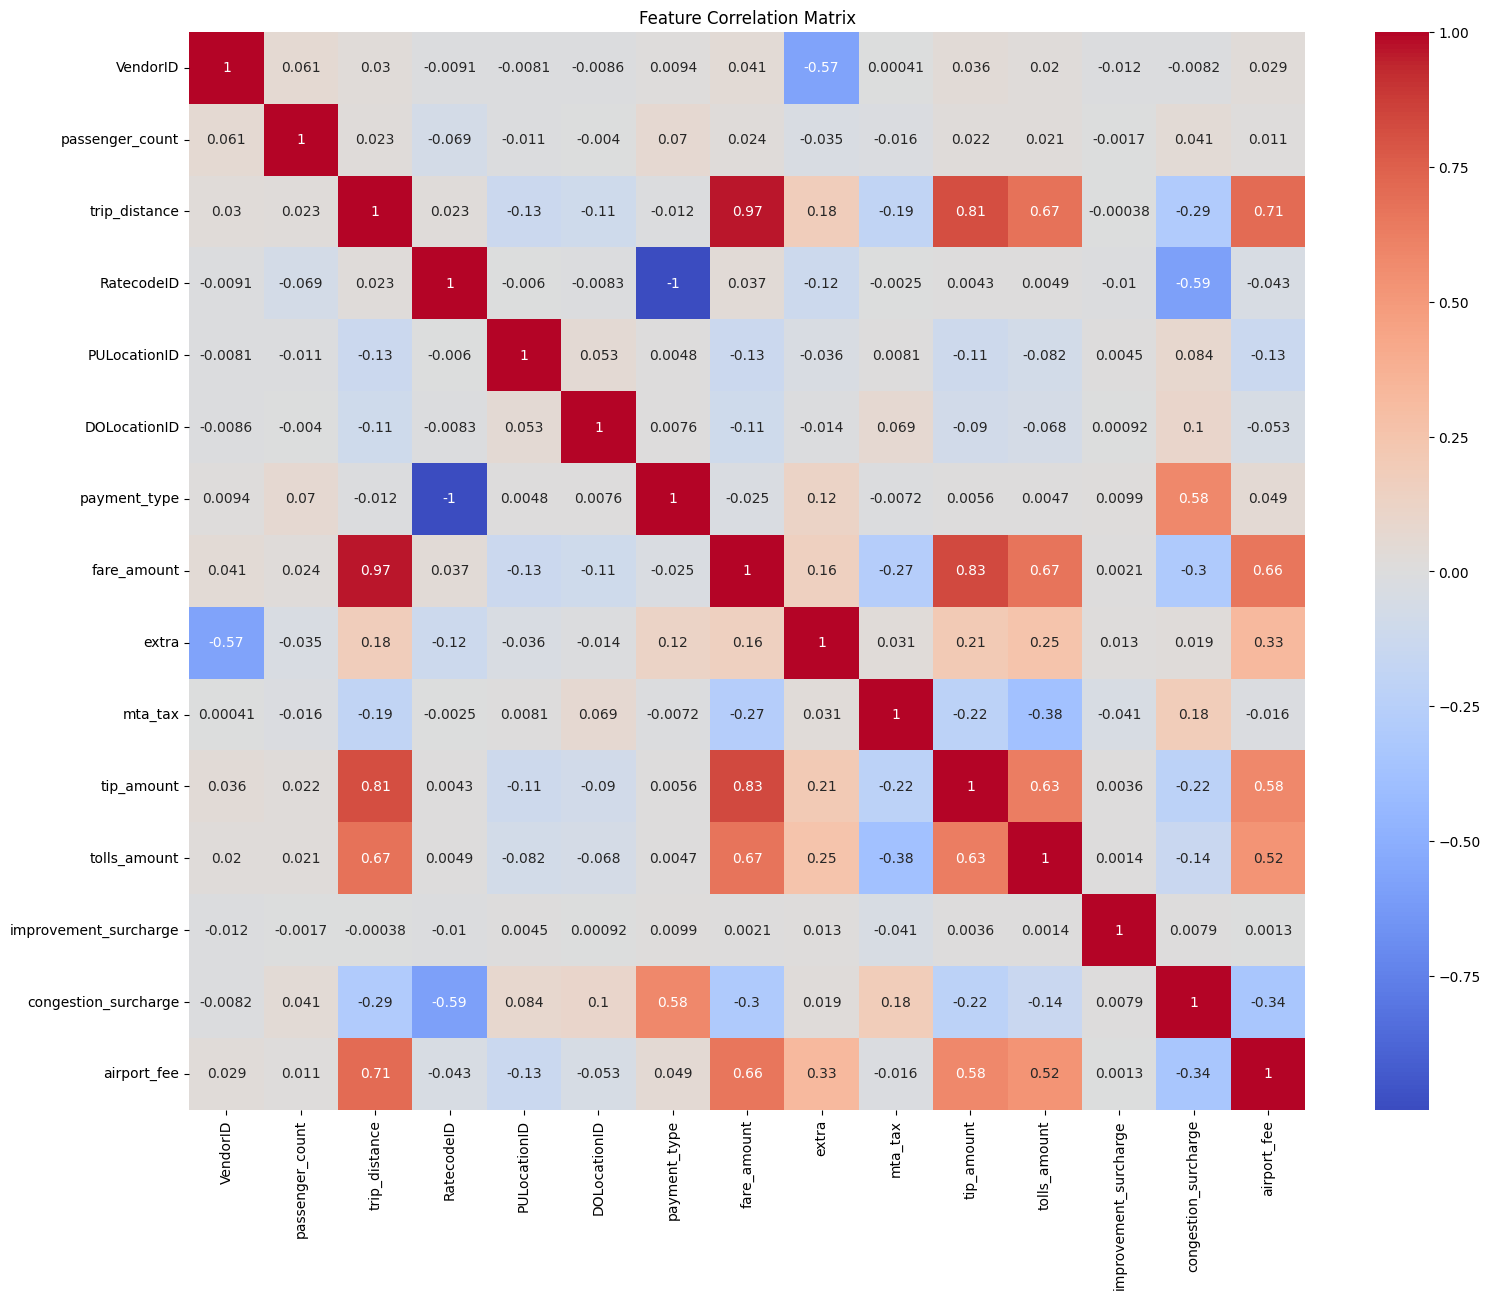

In [53]:
# Pairplot
#sns.pairplot(df[['fare_amount'[:1000], 'trip_distance'[:1000], 'tip_amount'[:1000], 'total_amount'[:1000]]])
#plt.show()

# Correlation Heatmap
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


## Machine Learning

In [54]:
# splitting our data
X = df.drop('tip_amount', axis=1)
y = df['tip_amount']

# split into training, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [55]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1905477, 336261, 1905477, 336261)

In [56]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
prediction = model.predict(x_test)
prediction

array([2.6020088, 2.402189 , 2.9600453, ..., 3.0356185, 3.658194 ,
       1.980712 ], dtype=float32)

In [58]:
model.score(x_test, y_test)

0.7077614976413984

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, prediction)


1.0700025829014705

In [60]:
mean_squared_error(y_test, prediction)

4.0398754575209095

## Hyperparameter tuning using optuna


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'tree_method': 'hist', # Use 'hist' with device='cuda' for GPU
        'device': 'cuda'
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, x_train, y_train,
                            scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                            cv=3).mean()
    return -score  # minimize MAE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10, show_progress_bar=True)

print("Best trial:")
print(study.best_trial.params)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error
# Make predictions on the test set

final_prediction = final_model.predict(x_test)

# Evaluate the final model using MAE and MSE
final_mae = mean_absolute_error(y_test, final_prediction)
final_mse = mean_squared_error(y_test, final_prediction)
final_r2 = r2_score(y_test, final_prediction)

print(f"Final Model Mean Absolute Error (MAE): {final_mae}")
print(f"Final Model Mean Squared Error (MSE): {final_mse}")
print(f"Final Model R2 Score: {final_r2}")

Final Model Mean Absolute Error (MAE): 1.0689474917221613
Final Model Mean Squared Error (MSE): 4.028688415774585
Final Model R2 Score: 0.708570751382051


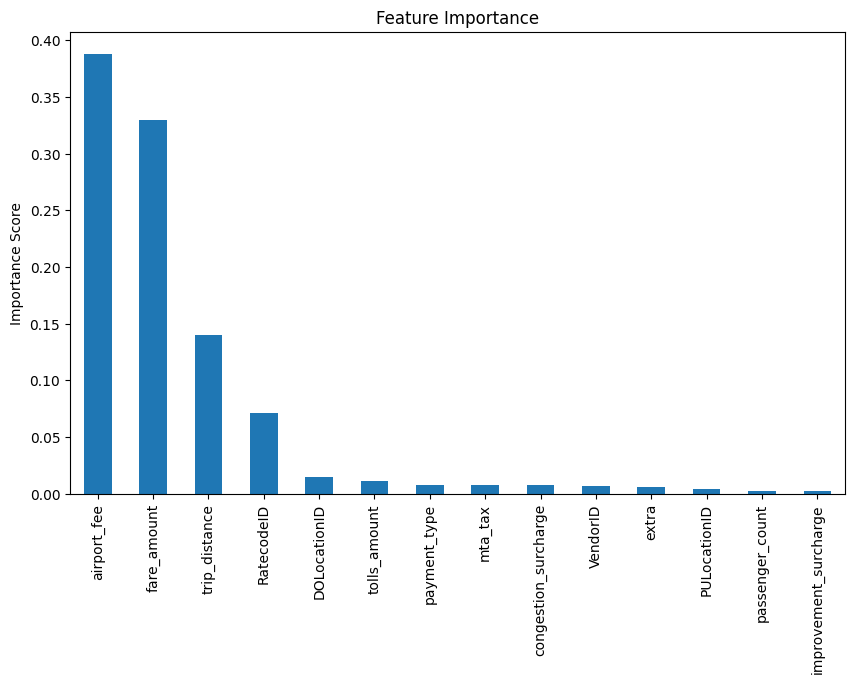

In [66]:
import matplotlib.pyplot as plt

# Get feature importance from the final model
feature_importance = final_model.feature_importances_

# Create a pandas Series for easier plotting
feature_importance_series = pd.Series(feature_importance, index=X.columns)

# Sort features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()